In [1]:
import numpy as np
import pandas as pd
import platform
import glob
import os
import matplotlib.pyplot as plt
%matplotlib inline

# Importing the Experimental data

In [2]:
data_folder = 'data'
oxigen_file = 'BCH-1438_Expt_O2.xls'
temperature_file = 'BCH-1438_Expt_Temp.xls'

In [3]:
platform_system = platform.system()
file_separator=''
if(platform_system=='Windows'):
    file_separator = '\\'
elif(platform_system=='Linux'):
    file_separator = '/'

In [4]:
oxigen_path =data_folder + file_separator + oxigen_file
temperature_path =data_folder + file_separator + temperature_file

In [5]:
oxigen_data = pd.read_excel(oxigen_path)
temperature_data = pd.read_excel(temperature_path)

In [6]:
print(oxigen_data.columns)
print(temperature_data.columns)

Index(['Time [min]', 'O2-01', 'O2-02', 'O2-03', 'O2-04', 'O2-05', 'O2-06',
       'O2-07', 'O2-08', 'O2-09', 'O2-10', 'O2-11', 'O2-12', 'O2-13', 'O2-14',
       'O2-15', 'O2-16', 'O2-17', 'O2-18'],
      dtype='object')
Index(['Time [min]', 'Temp_01', 'Temp_02', 'Temp_03', 'Temp_04', 'Temp_05',
       'Temp_06', 'Temp_07', 'Temp_08', 'Temp_09', 'Temp_10', 'Temp_11',
       'Temp_12', 'Temp_13', 'Temp_14', 'Temp_15', 'Temp_16', 'Temp_17',
       'Temp_18'],
      dtype='object')


In [7]:
oxigen_data.head(1)

,Time [min],O2-01,O2-02,O2-03,O2-04,O2-05,O2-06,O2-07,O2-08,O2-09,O2-10,O2-11,O2-12,O2-13,O2-14,O2-15,O2-16,O2-17,O2-18
0,0,20.84125,20.990333,20.885833,20.9325,20.961583,20.911667,20.957333,21.110833,20.968786,21.06381,20.99389,21.157397,20.98792,21.010186,21.102997,20.980817,20.98,20.965


In [8]:
temperature_data.head(1)

,Time [min],Temp_01,Temp_02,Temp_03,Temp_04,Temp_05,Temp_06,Temp_07,Temp_08,Temp_09,Temp_10,Temp_11,Temp_12,Temp_13,Temp_14,Temp_15,Temp_16,Temp_17,Temp_18
0,0,19.5,19.0,NaN,21.6,19.9,NaN,19.6,NaN,19.0,20.216667,NaN,19.9,19.7,19.3,NaN,20.2,20.108333,NaN


# Recreating the experimental plots
## $O_2$ Levels

In [9]:
save_plots = False
plots_folder = 'species_plots'

In [10]:
plot_experimental = False

In [11]:
x_values = oxigen_data['Time [min]']
if(plot_experimental):
    fig = plt.figure(figsize=(10,10))
    for i in range(1,oxigen_data.shape[1]):
        header = oxigen_data.columns[i]
        oxigen_values = oxigen_data[header]
        header = r'$O_2$'+header[2:]
        plt.plot(x_values, oxigen_values, label=r''+header, linewidth =4)
    plt.ylabel(r'$O_2$ [%]',fontsize='14')
    plt.xlabel(r'Time [min]',fontsize='14')
    plt.tick_params(labelsize=16)
    plt.legend(fontsize='16')
    plt.grid()
    plt.ylim(19.4,21.2)
    plt.title(r'$O_2$ Volume fraction', fontsize='16')
    if(save_plots): plt.savefig(plots_folder+file_separator+'O2_all_exp_level_'+str(j+1)+'.png')

In [39]:
detectors = np.arange(18)+1
levels = np.array([detectors[:6],detectors[6:12],detectors[12:]])
print(np.shape(levels))

(3, 6)


In [13]:
if(plot_experimental):
    for j in range(np.shape(levels)[0]):
        detectors_level = levels[j]
        fig = plt.figure(figsize=(10,10))
        for i in detectors_level:
            header = oxigen_data.columns[i]
            oxigen_values = oxigen_data[header]
            header = r'$O_2$'+header[2:]
            plt.scatter(x_values, oxigen_values,s=15, label=None)#, label='Group '+str(group_number))
            plt.plot(x_values, oxigen_values, label=r''+header, linewidth =2,linestyle='--')
        plt.ylabel(r'$O_2$ [%]',fontsize='14')
        plt.xlabel(r'Time [min]',fontsize='14')
        plt.tick_params(labelsize=16)
        plt.legend(fontsize='16')
        plt.grid()
        plt.ylim(19.4,21.2)
        plt.title(r'$O_2$ Volume fraction for Level '+str(j+1), fontsize='16')
        if(save_plots): plt.savefig(plots_folder+file_separator+'O2_only_exp_level_'+str(j+1)+'.png')

## Temperature

In [14]:
x_values = temperature_data['Time [min]']

In [15]:
if(plot_experimental):
    for j in range(np.shape(levels)[0]):
        detectors_level = levels[j]
        fig = plt.figure(figsize=(10,10))
        for i in detectors_level:
            header = temperature_data.columns[i]
            temperature_values = temperature_data[header]
            if(temperature_values.isnull().values.any()):
                print(header + ' has NaN values')
            else:
                if(header =='Temp_09'):
                    header = r'$T_{'+header[5:]+'}$ (suspected malfunctioning)'
                else:
                    header = r'$T_{'+header[5:]+'}$'
                plt.plot(x_values, temperature_values, label=r''+header, linewidth =4)
        plt.ylabel(r'Temperature [$^{\circ}$ C]',fontsize='14')
        plt.xlabel(r'Time [min]',fontsize='14')
        plt.tick_params(labelsize=16)
        plt.legend(fontsize='16')
        plt.grid()
        #plt.ylim(19.4,21.2)
        plt.title(r'Temperature for Level '+str(j+1), fontsize='16')
        if(save_plots): plt.savefig(plots_folder+file_separator+'Temp_only_exp_level_'+str(j+1)+'.png')

# Loading the simulation results

![about_sim.png](about_sim.png)

In [7]:
sim_number = 5
time_step_s = 0.23
n_time_steps = 44
time_shift = 14
time_shift_2 = 37
time_shift_3 = 14

In [8]:
#simulation_folder =data_folder + file_separator + 'simulation_2' + file_separator +'txt_file_for_comparison'
#simulation_folder =data_folder + file_separator + 'simulation_4' + file_separator +'txt_files'
simulation_folder =data_folder + file_separator + 'simulation_5' + file_separator +'txt_file_for_comparison'

In [9]:
files = glob.glob(simulation_folder+file_separator+'*.txt')
files.sort()

In [10]:
files[10:]

['data\\simulation_5\\txt_file_for_comparison\\pt_data_simulation_5-00484.txt',
 'data\\simulation_5\\txt_file_for_comparison\\pt_data_simulation_5-00528.txt',
 'data\\simulation_5\\txt_file_for_comparison\\pt_data_simulation_5-00572.txt',
 'data\\simulation_5\\txt_file_for_comparison\\pt_data_simulation_5-00616.txt',
 'data\\simulation_5\\txt_file_for_comparison\\pt_data_simulation_5-00660.txt',
 'data\\simulation_5\\txt_file_for_comparison\\pt_data_simulation_5-00704.txt',
 'data\\simulation_5\\txt_file_for_comparison\\pt_data_simulation_5-00748.txt',
 'data\\simulation_5\\txt_file_for_comparison\\pt_data_simulation_5-00792.txt',
 'data\\simulation_5\\txt_file_for_comparison\\pt_data_simulation_5-00836.txt',
 'data\\simulation_5\\txt_file_for_comparison\\pt_data_simulation_5-00880.txt',
 'data\\simulation_5\\txt_file_for_comparison\\pt_data_simulation_5-00924.txt',
 'data\\simulation_5\\txt_file_for_comparison\\pt_data_simulation_5-00968.txt',
 'data\\simulation_5\\txt_file_for_compa

In [11]:
for i in range(np.shape(files)[0]):
    file_sim = files[i]
    path, filename = os.path.split(file_sim)
    filename, file_extension = os.path.splitext(filename)
    
    time_step_number = (filename.split(sep='-')[1])
    if(len(time_step_number)<5):
        time_step_number = '0'+time_step_number
        file_new = (filename.split(sep='-')[0])+'-'+time_step_number + file_extension
        print('Renaming '+new_path)
        new_path = simulation_folder+ file_separator+file_new
        !mv $file_sim $new_path

In [12]:
files = glob.glob(simulation_folder+file_separator+'*.txt')
files.sort()

In [13]:
print('Files to process: ',np.shape(files)[0])

Files to process:  258


In [14]:
full_path = files[0]
path, filename = os.path.split(full_path)
filename, file_extension = os.path.splitext(filename)
time_step_number = int(filename.split(sep='-')[1])
time_seconds = time_step_number*time_step_s
time_min = time_seconds//60
if(sim_number==4): time_real = time_min + time_shift -time_shift_2
elif(sim_number==5): time_real = time_min + time_shift_3
else: time_real = time_min + time_shift

In [15]:
print(time_step_number,time_seconds,time_min,time_real) 

44 10.120000000000001 0.0 14.0


In [16]:
simulation_data = pd.read_csv(full_path,delim_whitespace=True)

In [17]:
print(simulation_data.shape)
print(simulation_data.columns)

(18, 12)
Index(['nodenumber', 'x-coordinate', 'y-coordinate', 'z-coordinate',
       'temperature', 'total-temperature', 'n2', 'air', 'molef-n2',
       'molef-air', 'concentration-n2', 'concentration-air'],
      dtype='object')


In [18]:
#Checking the order of the node-numbers
simulation_data.head(18)

,nodenumber,x-coordinate,y-coordinate,z-coordinate,temperature,total-temperature,n2,air,molef-n2,molef-air,concentration-n2,concentration-air
0,1,1.180011,0.700044,0.449955,292.000376,292.000380,9.122570e-08,1.000000,9.432784e-08,1.000000,3.762172e-09,0.039884
1,2,1.150003,1.299996,6.549998,292.000311,292.000313,2.821327e-20,1.000000,2.917267e-20,1.000000,1.163523e-21,0.039884
2,3,0.259998,1.299835,4.769962,292.000085,292.000089,4.085811e-18,1.000000,4.224750e-18,1.000000,1.684998e-19,0.039884
3,4,0.249996,1.300216,3.040011,292.000867,292.000868,1.049411e-08,1.000000,1.085097e-08,1.000000,4.327785e-10,0.039884
4,5,1.179989,1.700001,0.450003,291.999788,291.999790,1.545385e-23,1.000000,1.597936e-23,1.000000,6.373221e-25,0.039884
5,6,2.090001,1.699989,2.640041,292.000317,292.000323,6.988655e-14,1.000000,7.226306e-14,1.000000,2.882141e-15,0.039884
6,7,1.929999,1.700096,4.850038,291.999874,291.999878,6.069178e-17,1.000000,6.275562e-17,1.000000,2.502950e-18,0.039884
7,8,1.149998,1.699994,6.550002,291.999979,291.999994,7.056971e-22,1.000000,7.296945e-22,1.000000,2.910317e-23,0.039884
8,9,0.259953,1.699784,4.769790,291.998156,291.998159,2.619773e-17,1.000000,2.708859e-17,1.000000,1.080415e-18,0.039884
9,10,0.250033,1.700142,3.039604,292.004466,292.004469,1.684199e-11,1.000000,1.741471e-11,1.000000,6.945595e-13,0.039883


In [19]:
nodes_number = simulation_data['nodenumber'].values
exp_data = pd.DataFrame(data=nodes_number,columns=['nodenumber'])

In [20]:
exp_data['x-coordinate'] = [0.45,2.64,4.85,6.55,4.77,3.04,0.45,2.64,4.85,6.55,4.77,3.04,0.45,2.64,4.85,6.55,4.77,3.04]
exp_data['y-coordinate'] = [1.18,2.09,1.93,1.15,0.26,0.25,1.18,2.09,1.93,1.15,0.26,0.25,1.18,2.09,1.93,1.15,0.26,0.25]
exp_data['z-coordinate'] = [0.7,0.7,0.7,0.7,0.7,0.7,1.3,1.3,1.3,1.3,1.3,1.3,1.7,1.7,1.7,1.7,1.7,1.7]

In [32]:
exp_data_to_export = exp_data.set_index('nodenumber')

In [35]:
print(exp_data_to_export.to_latex())

\begin{tabular}{lrrr}
\toprule
{} &  x-coordinate &  y-coordinate &  z-coordinate \\
nodenumber &               &               &               \\
\midrule
1          &          0.45 &          1.18 &           0.7 \\
2          &          2.64 &          2.09 &           0.7 \\
3          &          4.85 &          1.93 &           0.7 \\
4          &          6.55 &          1.15 &           0.7 \\
5          &          4.77 &          0.26 &           0.7 \\
6          &          3.04 &          0.25 &           0.7 \\
7          &          0.45 &          1.18 &           1.3 \\
8          &          2.64 &          2.09 &           1.3 \\
9          &          4.85 &          1.93 &           1.3 \\
10         &          6.55 &          1.15 &           1.3 \\
11         &          4.77 &          0.26 &           1.3 \\
12         &          3.04 &          0.25 &           1.3 \\
13         &          0.45 &          1.18 &           1.7 \\
14         &          2.64 &          

In [21]:
def order_node_number(simulation_data,exp_data):
    simulation_data.rename(columns={'y-coordinate':'z-coordinate','z-coordinate':'x-coordinate','x-coordinate':'y-coordinate'}, inplace=True)
    simulation_data[['nodenumber','x-coordinate','y-coordinate', 'z-coordinate']] = simulation_data[['nodenumber','x-coordinate','y-coordinate', 'z-coordinate']].round(2)
    for index_exp, row in exp_data.iterrows():
        desired_node = simulation_data[(simulation_data[['x-coordinate']].values==row[['x-coordinate']].values)
                   & (simulation_data[['y-coordinate']].values==row[['y-coordinate']].values)
                   & (simulation_data[['z-coordinate']].values==row[['z-coordinate']].values)]
        desired_node.replace({int(desired_node[['nodenumber']].values):int(row[['nodenumber']].values)})
        new_column = pd.Series([row[['nodenumber']].values[0]], name='nodenumber', index=[desired_node.index.values[0]])
        simulation_data.update(new_column)
    simulation_data = simulation_data.sort_values('nodenumber')
    simulation_data = simulation_data.reset_index(drop=True)
    return simulation_data

In [22]:
oxigen_data_sim = pd.DataFrame(columns=oxigen_data.columns)
nitrogen_data_sim = pd.DataFrame(columns=oxigen_data.columns)
temperature_data_sim = pd.DataFrame(columns=temperature_data.columns)
temperature_total_data_sim = pd.DataFrame(columns=temperature_data.columns)

In [23]:
node_numbers = ((simulation_data['nodenumber'].values))

In [24]:
x_coordinate_sim = pd.DataFrame(columns = node_numbers)
y_coordinate_sim = pd.DataFrame(columns = node_numbers)
z_coordinate_sim = pd.DataFrame(columns = node_numbers)
concentration_air_sim = pd.DataFrame(columns = node_numbers)
concentration_n2_sim = pd.DataFrame(columns = node_numbers)
molef_n2_sim = pd.DataFrame(columns = node_numbers)
molef_air_sim = pd.DataFrame(columns = node_numbers)

In [25]:
x_coordinate_sim.insert(loc=0, column='Time [min]',value=[])
y_coordinate_sim.insert(loc=0, column='Time [min]',value=[])
z_coordinate_sim.insert(loc=0, column='Time [min]',value=[])
concentration_air_sim.insert(loc=0, column='Time [min]',value=[])
concentration_n2_sim.insert(loc=0, column='Time [min]',value=[])
molef_n2_sim.insert(loc=0, column='Time [min]',value=[])
molef_air_sim.insert(loc=0, column='Time [min]',value=[])

In [26]:
def append_column_to_row(dataframe_origin, dataframe_destination, column_name, first_column_value, index):
    """Extract the column from the dataframe, prepends a value and adds the row to the destination dataframe"""
    mini_row = dataframe_origin[column_name].values
    mini_row = np.insert(mini_row, 0, first_column_value, axis=0)
    dataframe_destination.loc[index] = mini_row

In [27]:
for i in range(np.shape(files)[0]):
    file_sim = files[i]
    path, filename = os.path.split(file_sim)
    filename, file_extension = os.path.splitext(filename)
    #print('Processing '+filename)
    time_step_number = int(filename.split(sep='-')[1])
    time_seconds = time_step_number*time_step_s
    time_min = time_seconds/60.0
    if(sim_number==4): time_real = time_min + time_shift -time_shift_2
    elif(sim_number==5): time_real = time_min + time_shift_3
    else: time_real = time_min + time_shift
    simulation_data = pd.read_csv(file_sim, delim_whitespace=True)
    simulation_data=order_node_number(simulation_data,exp_data)
    append_column_to_row(simulation_data,oxigen_data_sim,'air',time_real,i)
    append_column_to_row(simulation_data,nitrogen_data_sim,'n2',time_real,i)
    append_column_to_row(simulation_data,temperature_data_sim,'temperature',time_real,i)
    append_column_to_row(simulation_data,temperature_total_data_sim,'total-temperature',time_real,i)
    append_column_to_row(simulation_data,x_coordinate_sim,'x-coordinate',time_real,i)
    append_column_to_row(simulation_data,y_coordinate_sim,'y-coordinate',time_real,i)
    append_column_to_row(simulation_data,z_coordinate_sim,'z-coordinate',time_real,i)
    append_column_to_row(simulation_data,concentration_air_sim,'concentration-air',time_real,i)
    append_column_to_row(simulation_data,concentration_n2_sim,'concentration-n2',time_real,i)
    append_column_to_row(simulation_data,molef_n2_sim,'molef-n2',time_real,i)
    append_column_to_row(simulation_data,molef_air_sim,'molef-air',time_real,i)

In [28]:
def prepend_time_zero_row(df):
    first_artificial = df.iloc[0].copy(deep=True).values
    first_artificial[0]=0.0 #changing the time
    df.loc[-1] = first_artificial  # adding a row
    df.index = df.index + 1  # shifting index
    df.sort_index(inplace=True) 

In [29]:
prepend_time_zero_row(oxigen_data_sim)
prepend_time_zero_row(nitrogen_data_sim)
prepend_time_zero_row(temperature_data_sim)
prepend_time_zero_row(temperature_total_data_sim)
prepend_time_zero_row(x_coordinate_sim)
prepend_time_zero_row(y_coordinate_sim)
prepend_time_zero_row(z_coordinate_sim)
prepend_time_zero_row(concentration_air_sim)
prepend_time_zero_row(concentration_n2_sim)
prepend_time_zero_row(molef_n2_sim)
prepend_time_zero_row(molef_air_sim)

In [30]:
temperature_data_sim.head(2)

,Time [min],Temp_01,Temp_02,Temp_03,Temp_04,Temp_05,Temp_06,Temp_07,Temp_08,Temp_09,Temp_10,Temp_11,Temp_12,Temp_13,Temp_14,Temp_15,Temp_16,Temp_17,Temp_18
0,0.000000,292.000376,291.996987,291.999968,291.999827,292.001329,291.996581,292.00009,292.0004,291.999745,292.000311,292.000085,292.000867,291.999788,292.000317,291.999874,291.999979,291.998156,292.004466
1,14.168667,292.000376,291.996987,291.999968,291.999827,292.001329,291.996581,292.00009,292.0004,291.999745,292.000311,292.000085,292.000867,291.999788,292.000317,291.999874,291.999979,291.998156,292.004466


## Plotting the simulation results

In [45]:
save_plots = True
plots_folder = 'species_plots'

We are talking about the Redlich-Kwong EOS (1949). We have:
$$\left( P + \dfrac{a}{\sqrt{T} \bar{V} (\bar{V} + b)} \right) ( \bar{V}-b) = RT \label{10.1}$$
So we get, for a and b after relating to the critical temperatures and pressures of a material:
$$a =0.42780 \dfrac{R^2T_c^{2.5}}{P_c} \label{10.2a}$$
and
$$b =0.086640 \dfrac{RT_c}{P_c} \label{10.2b}$$

Here we cannot use the ideal gas law one to one equivalence between molar fraction and volume fraction

## Volume Fraction conversion
$$ v_{air} = m_{air} * M_{air} *\rho_{air}^{-1}$$ with $m_{air}$ the molar concentration $[mol/m^3]$, $M_{air}$ the molar mass of air $[g/mol]$ and $\rho_{air}$ the density of air $[g/m^3]$

In [52]:
M_air = 29.0
rho_air = 1.204
oxigen_data_vm_sim = concentration_air_sim.copy()
oxigen_data_vm_sim.head(1)
for j in range(np.shape(levels)[0]):
    detectors_level = levels[j]
    for i in detectors_level:
        header = oxigen_data_vm_sim.columns[i]
        air_values = oxigen_data_vm_sim[header]
        air_values = air_values * M_air/rho_air +1.0-0.960661
        air_values[air_values>1.0] = 1.0
        oxigen_data_vm_sim[header] = air_values
oxigen_data_vm_sim.head(1)

,Time [min],1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.0,1.0,0.999941,1.0,1.0,0.999997,1.0,1.0,1.0,1.0,1.0,1.0,0.999999,1.0,1.0,1.0,1.0,1.0,0.999987


## $O_2$ Levels
### Note about the oxygen
The results correspond to the air fraction. Oxygen correspond to 20.95% of air. So we will scale our results to get the oxygen fraction of the volume.

In [53]:
oxygen_fraction = 0.2095

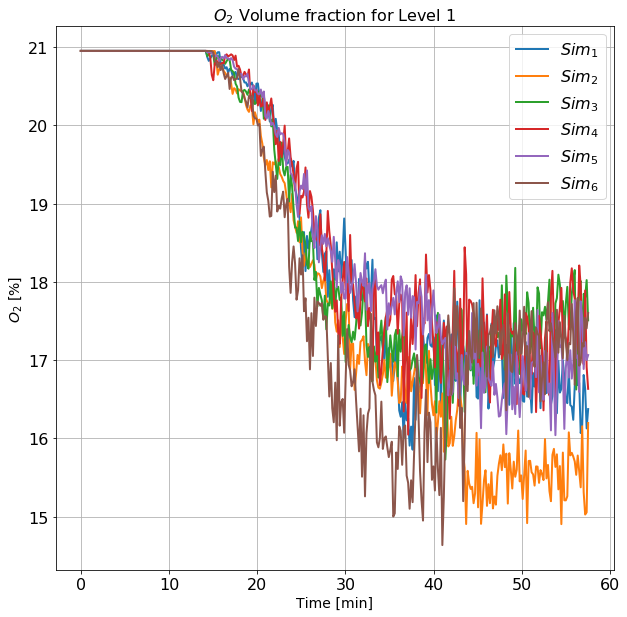

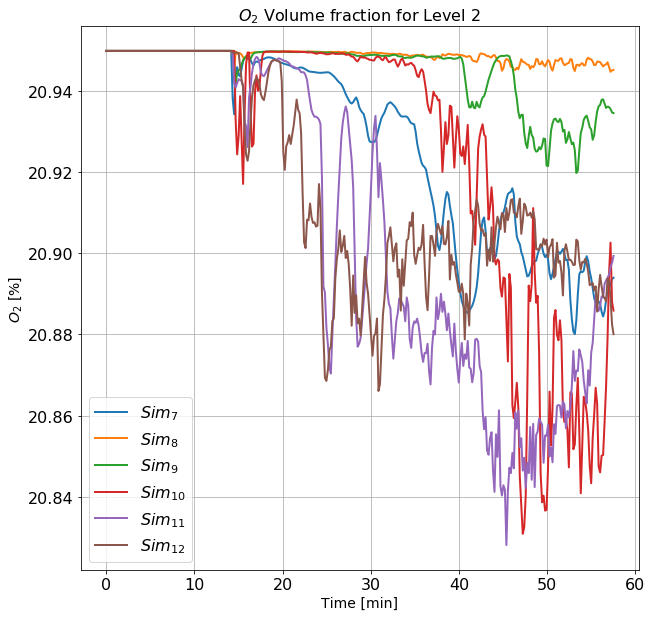

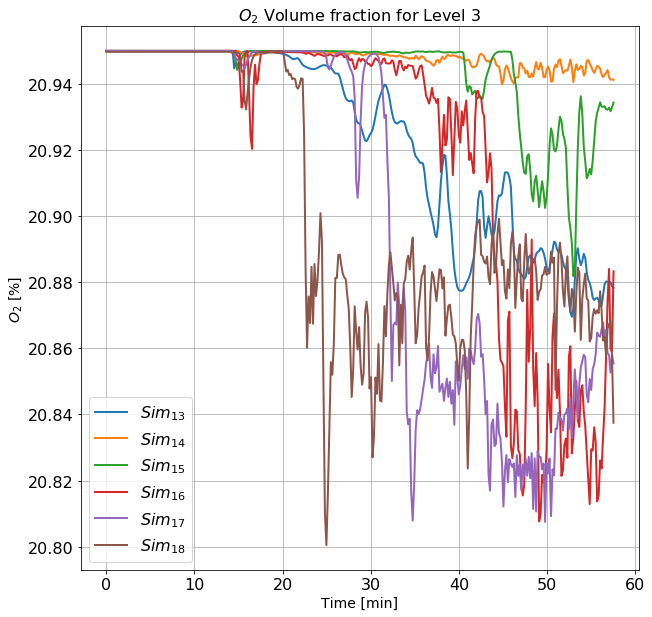

In [54]:
x_values_sim = oxigen_data_vm_sim['Time [min]']
for j in range(np.shape(levels)[0]):
    detectors_level = levels[j]
    fig = plt.figure(figsize=(10,10))
    for i in detectors_level:
        header = oxigen_data_vm_sim.columns[i]
        oxigen_values = oxigen_data_vm_sim[header]*oxygen_fraction*100
        header = r'$Sim_{'+str(header)+'}$'
        plt.plot(x_values_sim, oxigen_values, label=r''+header, linewidth =2)
    plt.ylabel(r'$O_2$ [%]',fontsize='14')
    plt.xlabel(r'Time [min]',fontsize='14')
    plt.tick_params(labelsize=16)
    plt.legend(fontsize='16')
    plt.grid()
    #plt.ylim(19.4,21.2)
    plt.title(r'$O_2$ Volume fraction for Level '+str(j+1), fontsize='16')
    if(save_plots): plt.savefig(plots_folder+file_separator+'O2_only_sim_level_'+str(j+1)+'.png')

## Smoothing

In [55]:
#Taken from http://scipy-cookbook.readthedocs.io/items/SignalSmooth.html
def smooth(x,window_len=12,window='hanning'):
    if x.ndim != 1:
        raise (ValueError, "smooth only accepts 1 dimension arrays.")

    if x.size < window_len:
        raise (ValueError, "Input vector needs to be bigger than window size.")

    if window_len<3:
        return x
    if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
        raise (ValueError, "Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'")
    s=np.r_[x[window_len-1:0:-1],x,x[-2:-window_len-1:-1]]
    #print(len(s))
    if window == 'flat': #moving average
        w=np.ones(window_len,'d')
    else:
        w=eval('np.'+window+'(window_len)')
    y=np.convolve(w/w.sum(),s,mode='valid')
    return y[(window_len//2-1):-(window_len//2)]

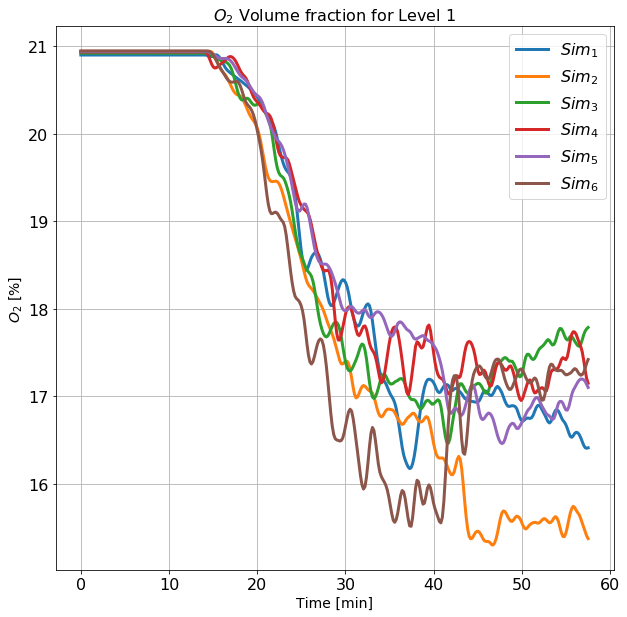

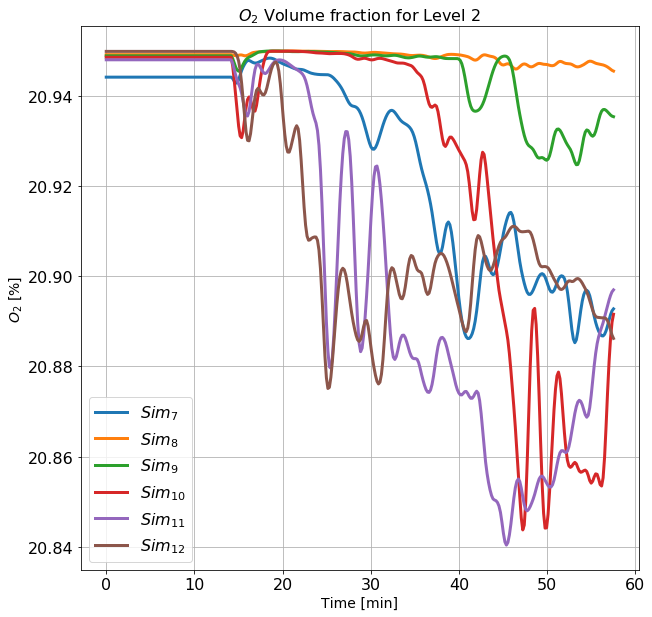

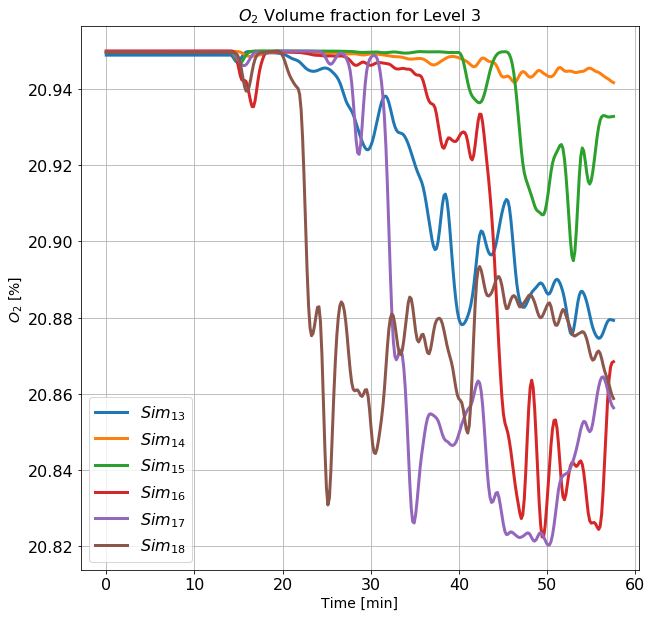

In [56]:
x_values_sim = oxigen_data_vm_sim['Time [min]']
for j in range(np.shape(levels)[0]):
    detectors_level = levels[j]
    fig = plt.figure(figsize=(10,10))
    for i in detectors_level:
        header = oxigen_data_vm_sim.columns[i]
        oxigen_values = oxigen_data_vm_sim[header]*oxygen_fraction*100
        header = r'$Sim_{'+str(header)+'}$'
        plt.plot(x_values_sim, smooth(oxigen_values.values), label=r''+header, linewidth =3)
    plt.ylabel(r'$O_2$ [%]',fontsize='14')
    plt.xlabel(r'Time [min]',fontsize='14')
    plt.tick_params(labelsize=16)
    plt.legend(fontsize='16')
    plt.grid()
    #plt.ylim(19.4,21.2)
    plt.title(r'$O_2$ Volume fraction for Level '+str(j+1), fontsize='16')
    if(save_plots): plt.savefig(plots_folder+file_separator+'O2_smooth_only_sim_level_'+str(j+1)+'.png')

## Temperature
### Note about the Temperature
Temperature results are in Kelvin. We substract 273.15 to get Celcius as the experimental data.

In [57]:
temperature_shif = 273.15

In [58]:
x_values_sim = temperature_data_sim['Time [min]']

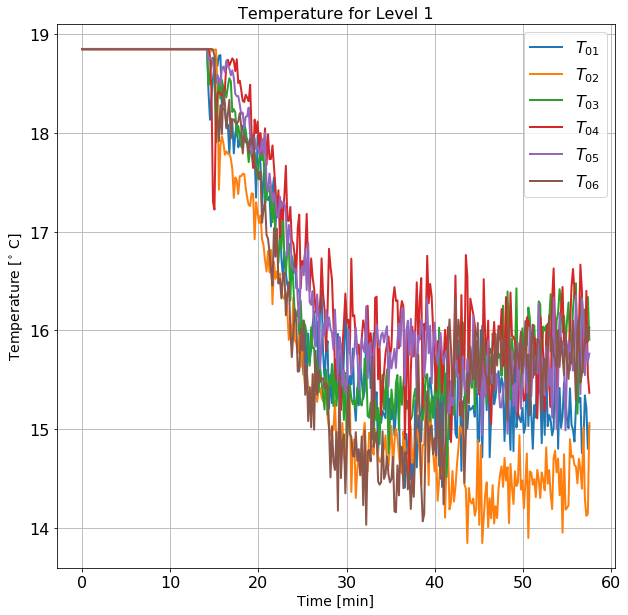

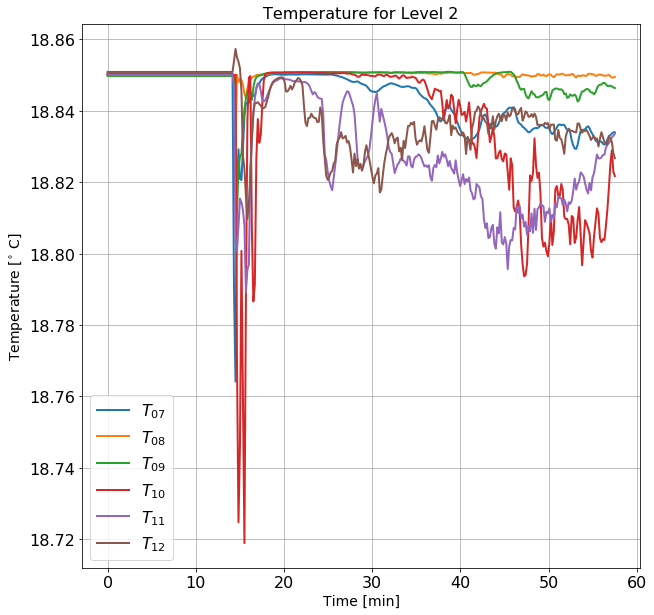

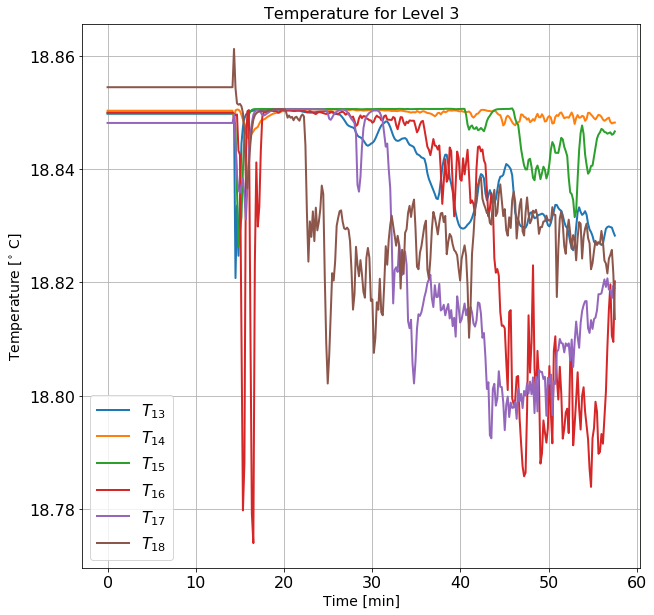

In [47]:
for j in range(np.shape(levels)[0]):
    detectors_level = levels[j]
    fig = plt.figure(figsize=(10,10))
    for i in detectors_level:
        header = temperature_data_sim.columns[i]
        temperature_values = temperature_data_sim[header] - temperature_shif
        header = r'$T_{'+header[5:]+'}$'
        plt.plot(x_values_sim, temperature_values, label=r''+header, linewidth =2)
    plt.ylabel(r'Temperature [$^{\circ}$ C]',fontsize='14')
    plt.xlabel(r'Time [min]',fontsize='14')
    plt.tick_params(labelsize=16)
    plt.legend(fontsize='16')
    plt.grid()
    #plt.ylim(19.4,21.2)
    plt.title(r'Temperature for Level '+str(j+1), fontsize='16')
    if(save_plots): plt.savefig(plots_folder+file_separator+'temperature_spieces_level_'+str(j+1)+'.png')

## Smoothing

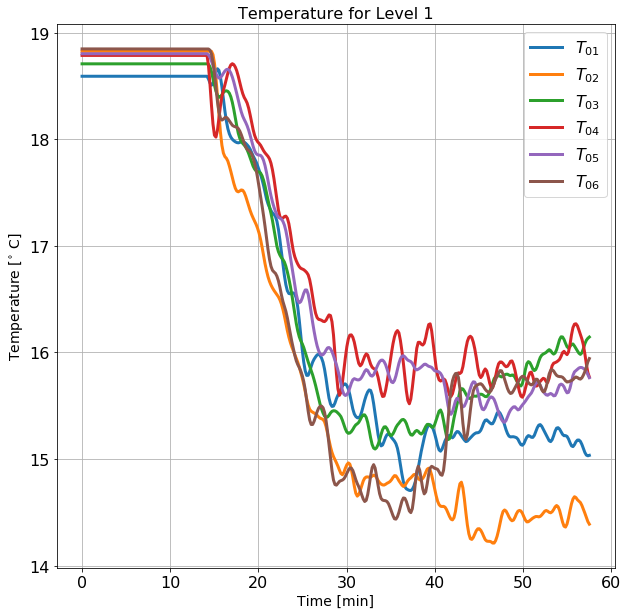

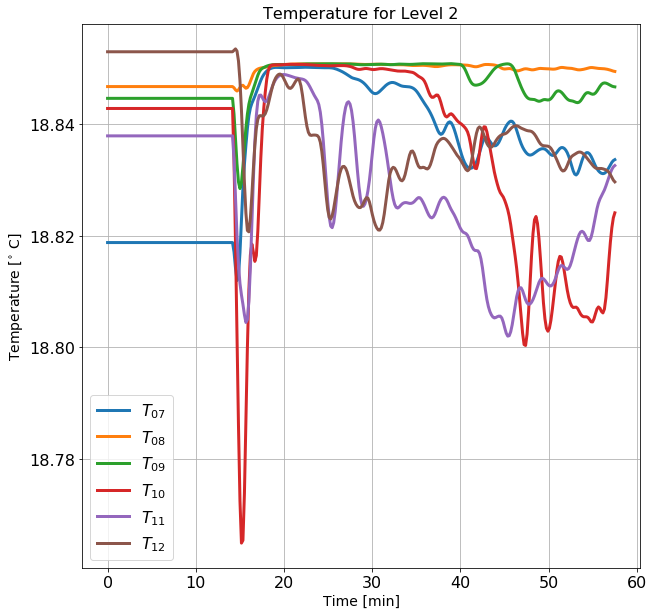

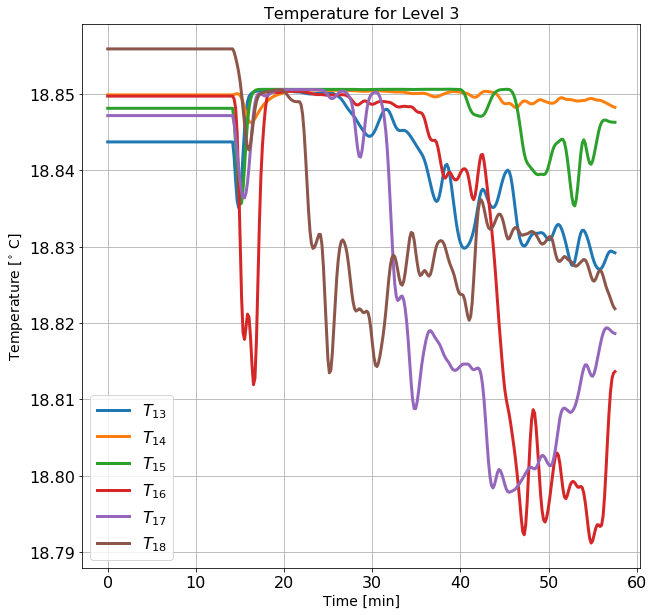

In [48]:
for j in range(np.shape(levels)[0]):
    detectors_level = levels[j]
    fig = plt.figure(figsize=(10,10))
    for i in detectors_level:
        header = temperature_data_sim.columns[i]
        temperature_values = temperature_data_sim[header] - temperature_shif
        header = r'$T_{'+header[5:]+'}$'
        plt.plot(x_values_sim, smooth(temperature_values.values), label=r''+header, linewidth =3)
    plt.ylabel(r'Temperature [$^{\circ}$ C]',fontsize='14')
    plt.xlabel(r'Time [min]',fontsize='14')
    plt.tick_params(labelsize=16)
    plt.legend(fontsize='16')
    plt.grid()
    #plt.ylim(19.4,21.2)
    plt.title(r'Temperature for Level '+str(j+1), fontsize='16')
    if(save_plots): plt.savefig(plots_folder+file_separator+'Temp_smooth_spieces_level_'+str(j+1)+'.png')

## Plotting the "Total Temperature"

In [49]:
plot_total_temp = False

In [50]:
temperature_shif = 273.15

In [51]:
if(plot_total_temp):
    x_values_sim = temperature_total_data_sim['Time [min]']
    for j in range(np.shape(levels)[0]):
        detectors_level = levels[j]
        fig = plt.figure(figsize=(10,10))
        for i in detectors_level:
            header = temperature_total_data_sim.columns[i]
            temperature_values = temperature_total_data_sim[header] - temperature_shif
            header = r'$T_{'+header[5:]+'}$'
            plt.plot(x_values_sim, temperature_values, label=r''+header, linewidth =4)
        plt.ylabel(r'Temperature [$^{\circ}$ C]',fontsize='14')
        plt.xlabel(r'Time [min]',fontsize='14')
        plt.tick_params(labelsize=16)
        plt.legend(fontsize='16')
        plt.grid()
        #plt.ylim(19.4,21.2)
        plt.title(r'"Total" Temperature for Level '+str(j+1), fontsize='16')
        if(save_plots): plt.savefig(plots_folder+file_separator+'Temp_total_spieces_level_'+str(j+1)+'.png')

## Plotting Simulation values and Experimental values together
### Plotting smooth results for simplier visualization

## $O_2$ Levels

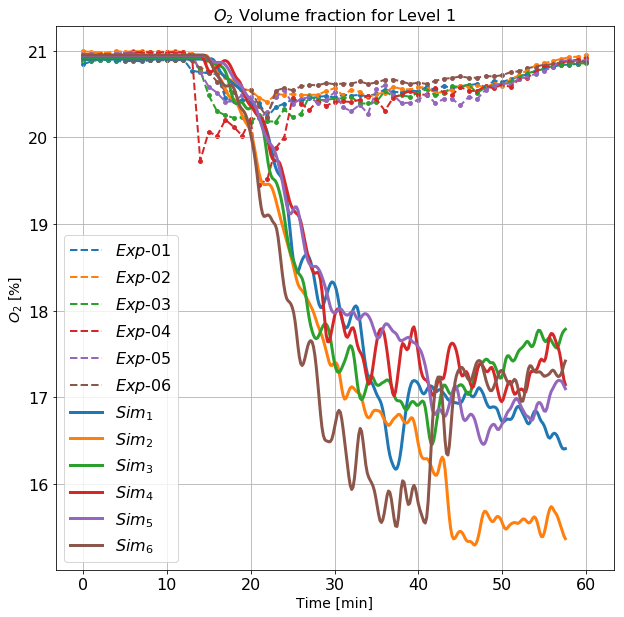

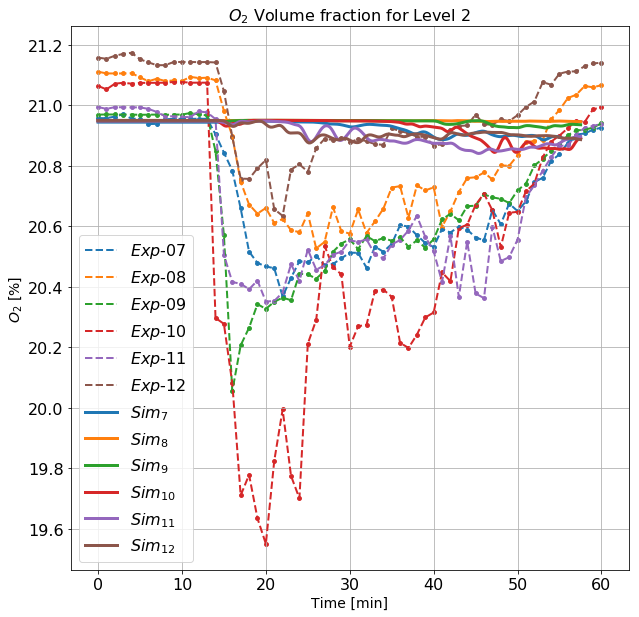

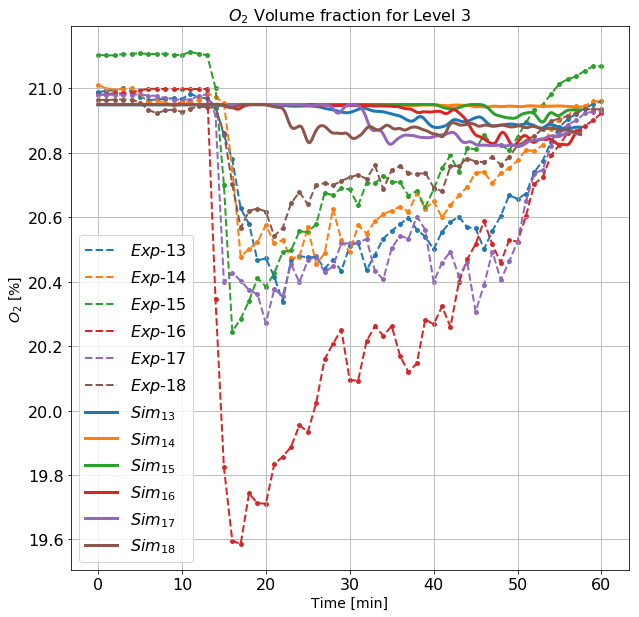

In [59]:
x_values_exp = oxigen_data['Time [min]']
x_values_sim = oxigen_data_vm_sim['Time [min]']
for j in range(np.shape(levels)[0]):
    detectors_level = levels[j]
    fig = plt.figure(figsize=(10,10))
    for i in detectors_level:
        header = oxigen_data.columns[i]
        oxigen_values_exp = oxigen_data[header]
        header = r'$Exp$'+header[2:]
        plt.scatter(x_values_exp, oxigen_values_exp,s=15, label=None)#, label='Group '+str(group_number))
        plt.plot(x_values_exp, oxigen_values_exp, label=r''+header, linewidth =2,linestyle='--')
    plt.gca().set_prop_cycle(None)
    for i in detectors_level:
        header = oxigen_data_vm_sim.columns[i]
        oxigen_values = oxigen_data_vm_sim[header]*oxygen_fraction*100
        header = r'$Sim_{'+str(header)+'}$'
        plt.plot(x_values_sim, smooth(oxigen_values.values), label=r''+header, linewidth =3)
    plt.ylabel(r'$O_2$ [%]',fontsize='14')
    plt.xlabel(r'Time [min]',fontsize='14')
    plt.tick_params(labelsize=16)
    plt.legend(fontsize='16')
    plt.grid()
    #plt.ylim(19.4,21.2)
    plt.title(r'$O_2$ Volume fraction for Level '+str(j+1), fontsize='16')
    if(save_plots): plt.savefig(plots_folder+file_separator+'O2_val_smooth_species_level_'+str(j+1)+'.png')

## Temperature levels

Temp_03 has NaN values
Temp_06 has NaN values
Temp_08 has NaN values
Temp_11 has NaN values
Temp_15 has NaN values
Temp_18 has NaN values


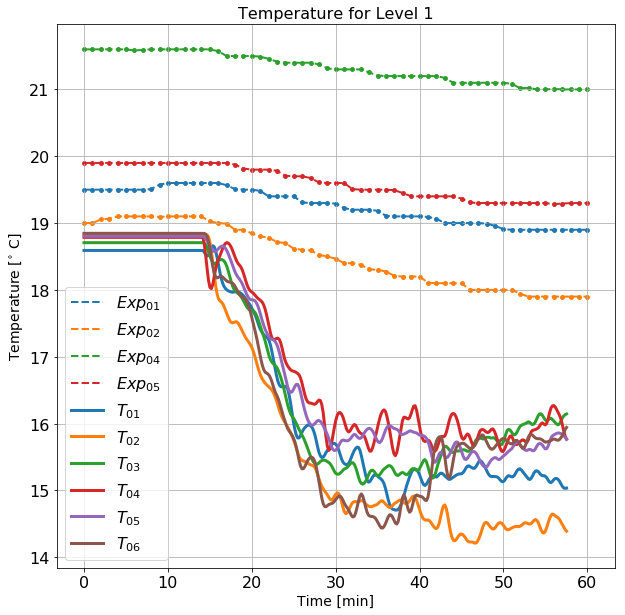

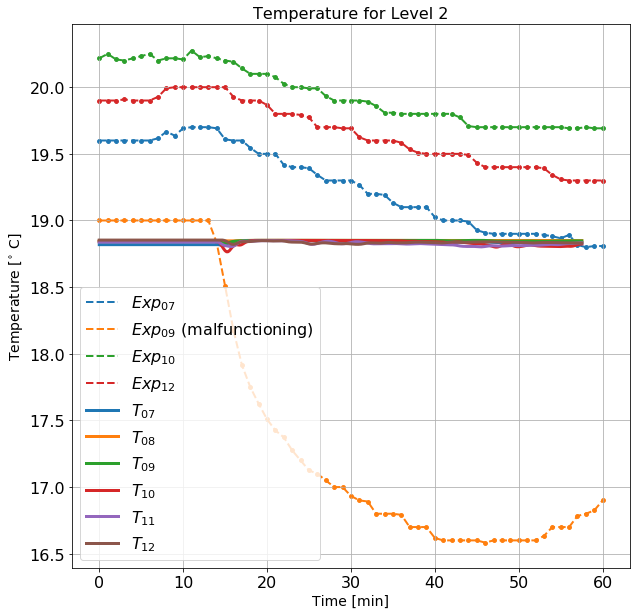

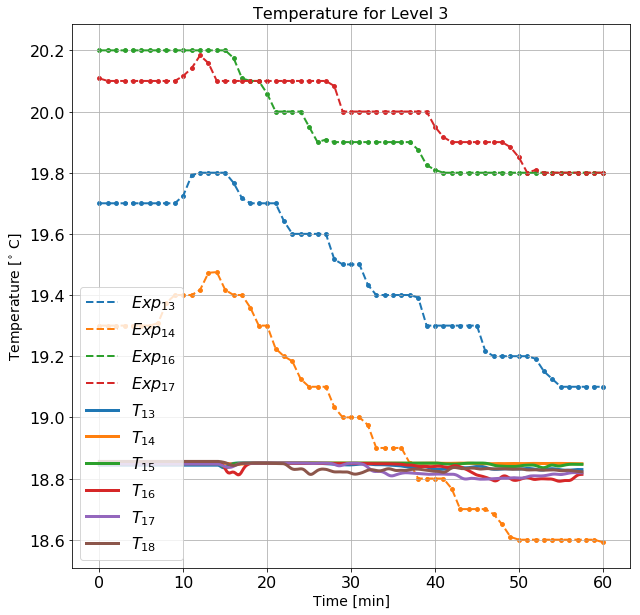

In [53]:
x_values_exp = temperature_data['Time [min]']
x_values_sim = temperature_data_sim['Time [min]']
for j in range(np.shape(levels)[0]):
    detectors_level = levels[j]
    fig = plt.figure(figsize=(10,10))
    for i in detectors_level:
        header = temperature_data.columns[i]
        temperature_values = temperature_data[header]
        if(temperature_values.isnull().values.any()):
            print(header + ' has NaN values')
        else:
            if(header =='Temp_09'):
                header = r'$Exp_{'+header[5:]+'}$ (malfunctioning)'
            else:
                header = r'$Exp_{'+header[5:]+'}$'
            plt.scatter(x_values_exp, temperature_values,s=15, label=None)
            plt.plot(x_values_exp, temperature_values, label=r''+header, linewidth =2,linestyle='--')
    plt.gca().set_prop_cycle(None)
    for i in detectors_level:
        header = temperature_data_sim.columns[i]
        temperature_values = temperature_data_sim[header] - temperature_shif
        header = r'$T_{'+header[5:]+'}$'
        plt.plot(x_values_sim, smooth(temperature_values.values), label=r''+header, linewidth =3)
    plt.ylabel(r'Temperature [$^{\circ}$ C]',fontsize='14')
    plt.xlabel(r'Time [min]',fontsize='14')
    plt.tick_params(labelsize=16)
    plt.legend(fontsize='16')
    plt.grid()
    #plt.ylim(19.4,21.2)
    plt.title(r'Temperature for Level '+str(j+1), fontsize='16')
    if(save_plots): plt.savefig(plots_folder+file_separator+'Temp_val_smooth_spieces_level_'+str(j+1)+'.png')

# Plotting the other simulation values

In [54]:
def plot_levels_simple(dataframe, levels, ylabel, title, legend_pre,smooth_bool,save_fig, save_title, plots_folder,file_separator):
    """Plots the given data frame per levels."""
    x_values_sim = dataframe['Time [min]']
    for j in range(np.shape(levels)[0]):
        detectors_level = levels[j]
        fig = plt.figure(figsize=(10,10))
        for i in detectors_level:
            header = dataframe.columns[i]
            y_values = dataframe[header]
            header = r'$'+legend_pre+'_{'+str(header)+'}$'
            if(smooth_bool):
                plt.plot(x_values_sim, smooth(y_values.values), label=r''+header, linewidth =3)
            else:
                plt.plot(x_values_sim, y_values, label=r''+header, linewidth =4)
        plt.ylabel(r''+ylabel,fontsize='14')
        plt.xlabel(r'Time [min]',fontsize='14')
        plt.tick_params(labelsize=16)
        plt.legend(fontsize='16')
        plt.grid()
        #plt.ylim(19.4,21.2)
        plt.title(r''+title+' for Level '+str(j+1), fontsize='16')
        if(save_fig): plt.savefig(plots_folder+file_separator+save_title+str(j+1)+'.png')

In [55]:
want_to_plot_other_values = True
want_to_smooth_other_values = True
want_to_save_other_values = True
want_to_plot_coordinates = False

## Other values

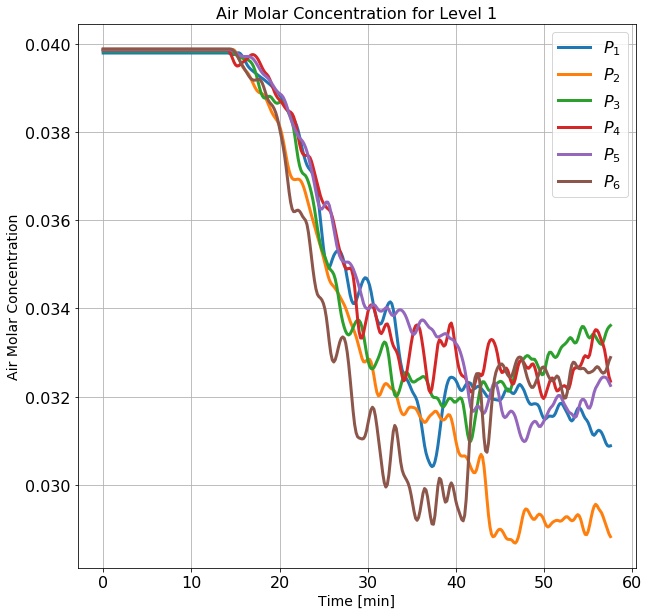

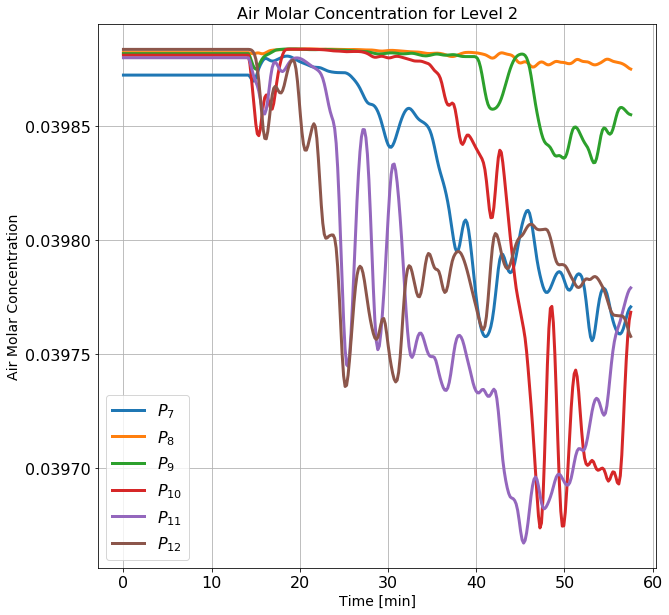

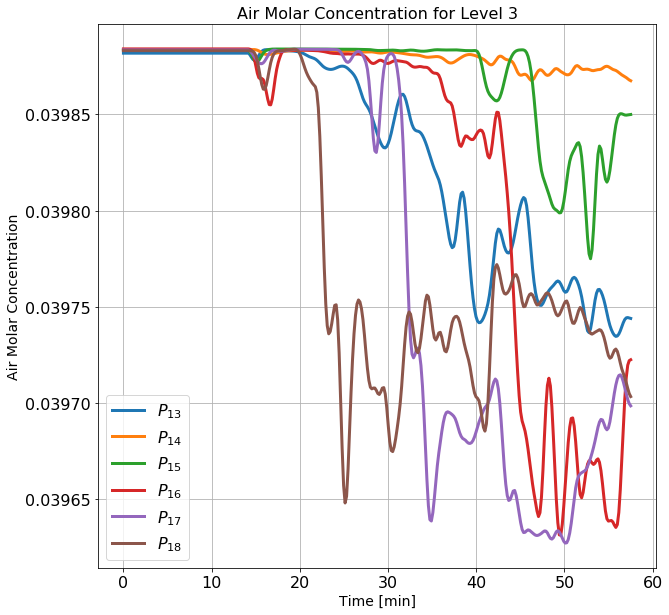

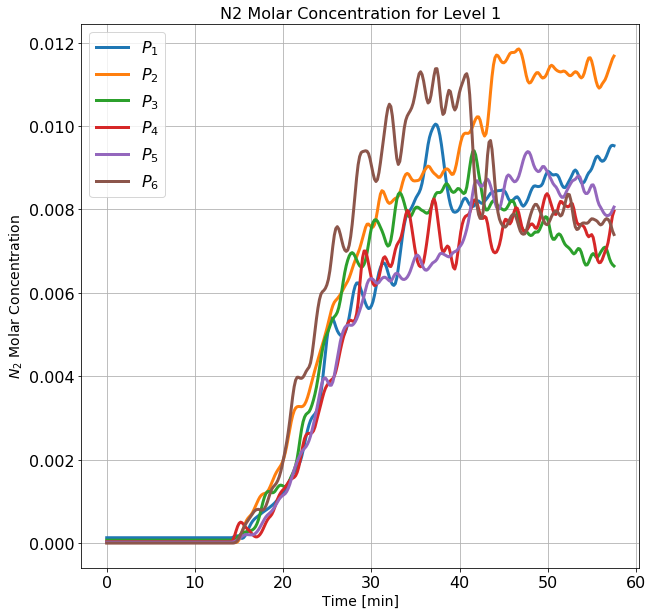

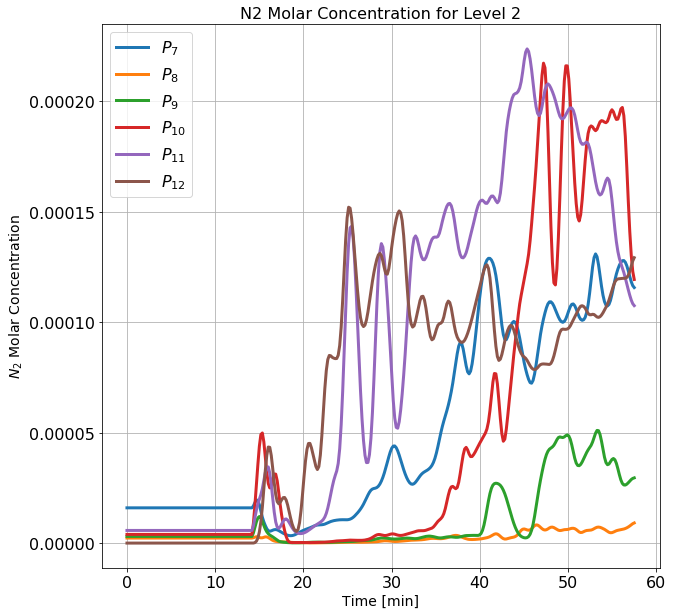

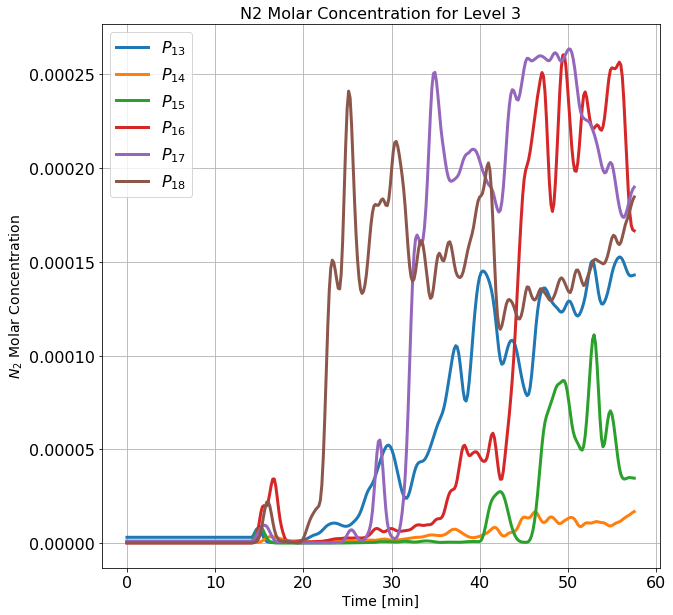

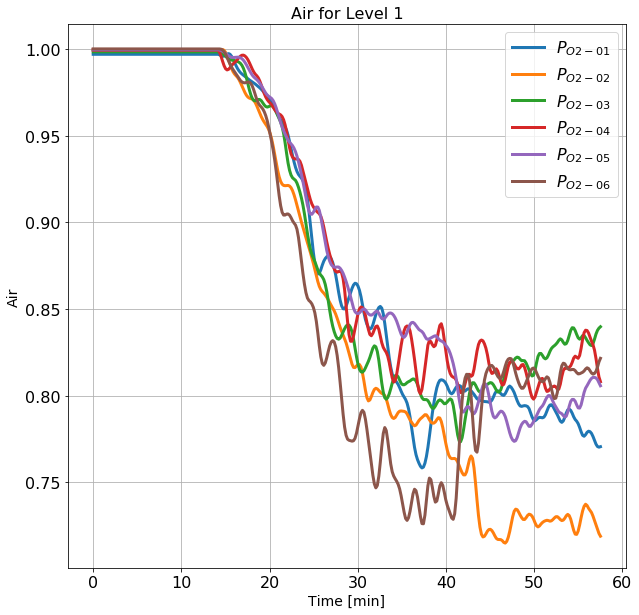

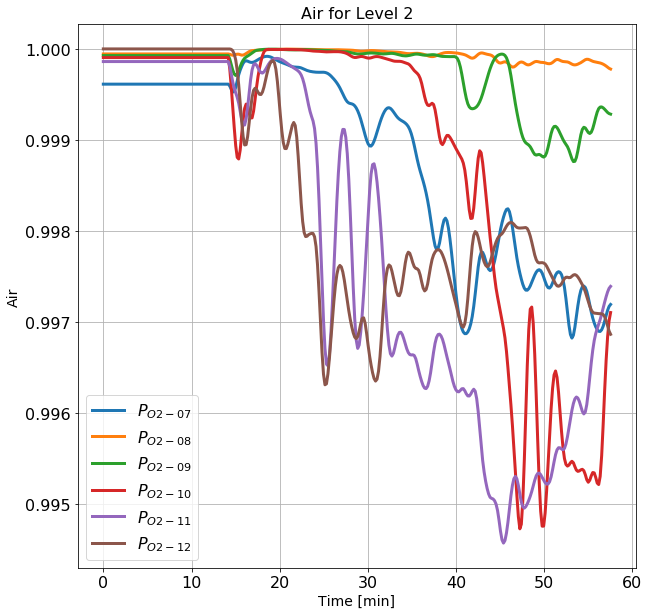

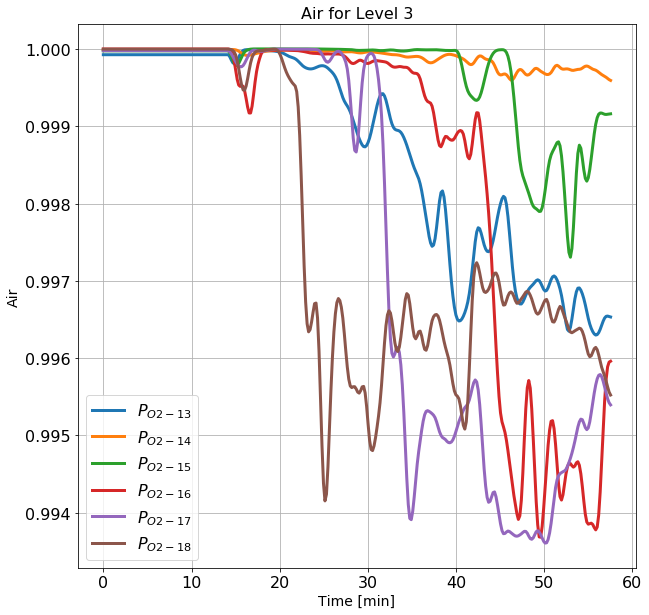

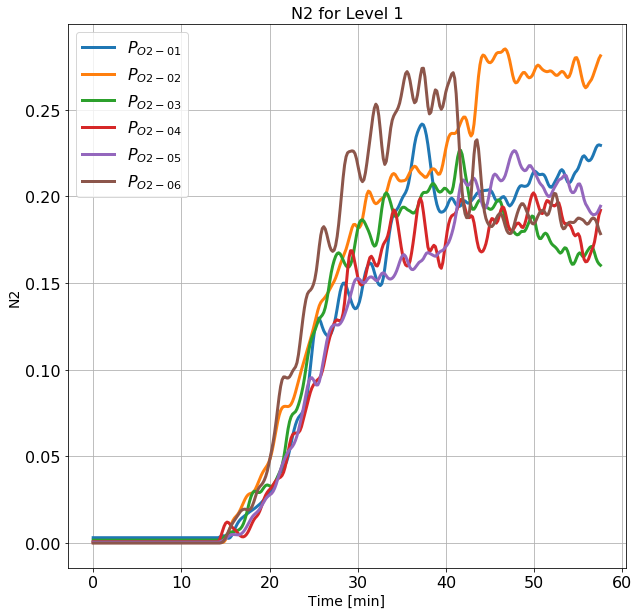

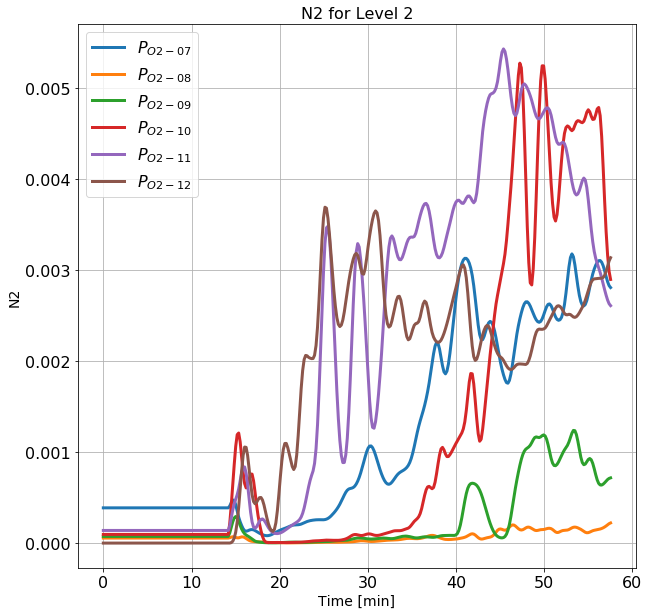

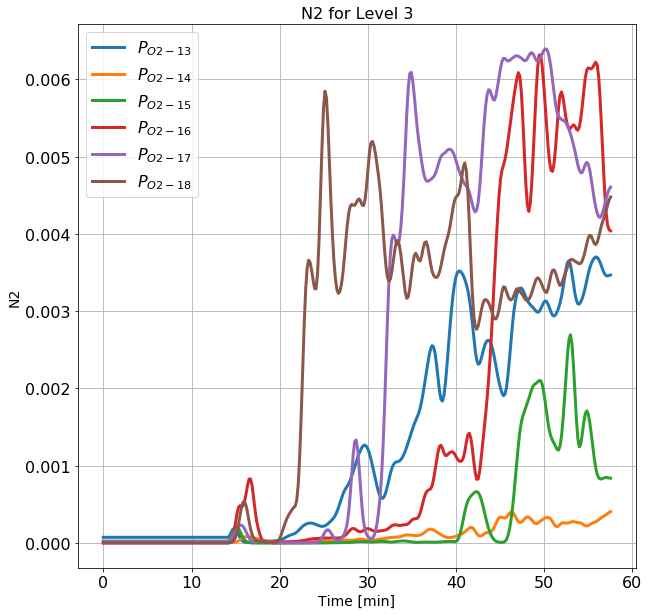

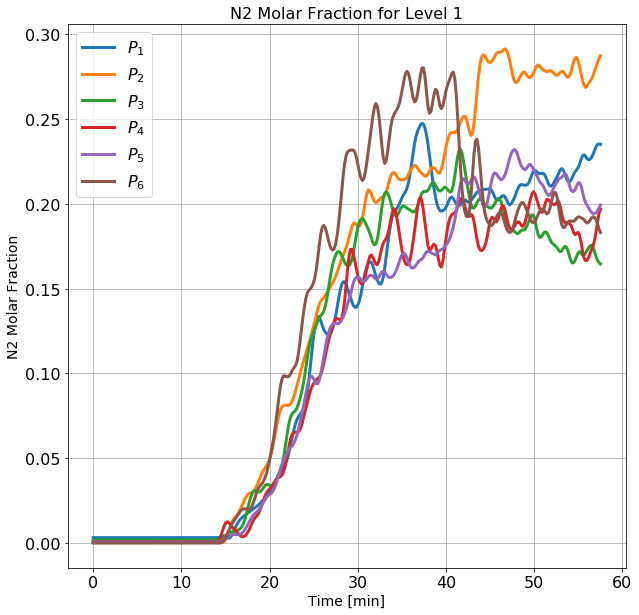

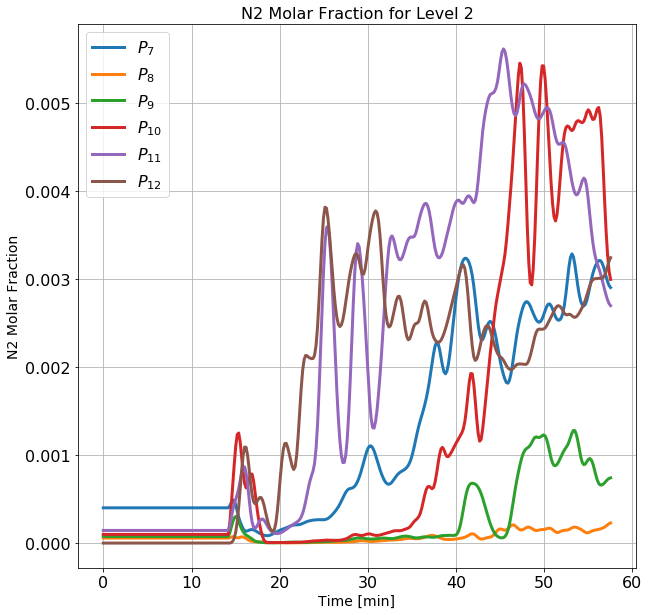

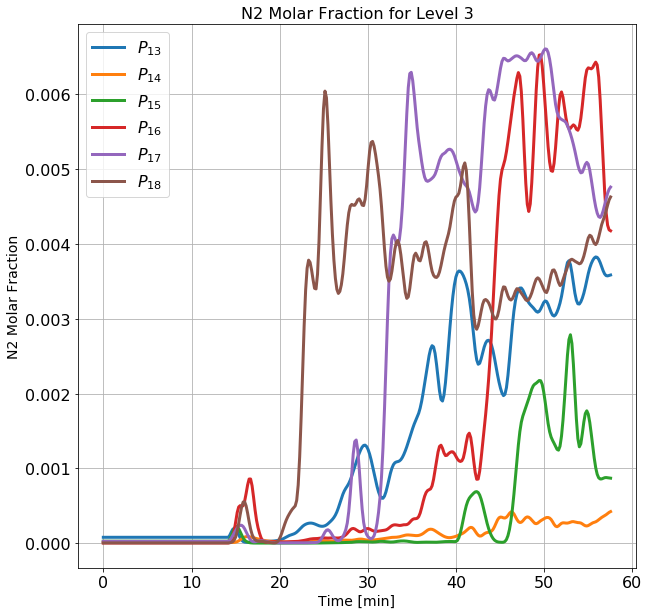

In [56]:
if(want_to_plot_other_values):
    #concentration_air_sim.values = concentration_air_sim.values*oxygen_fraction
    plot_levels_simple(concentration_air_sim,levels,'Air Molar Concentration','Air Molar Concentration','P',want_to_smooth_other_values,want_to_save_other_values, 'air_con_smooth_', plots_folder,file_separator)
    plot_levels_simple(concentration_n2_sim,levels,'$N_2$ Molar Concentration','N2 Molar Concentration','P',want_to_smooth_other_values,want_to_save_other_values, 'n2_con_smooth_', plots_folder,file_separator)
    plot_levels_simple(oxigen_data_sim,levels,'Air','Air','P',want_to_smooth_other_values,want_to_save_other_values, 'air_only_smooth_', plots_folder,file_separator)
    plot_levels_simple(nitrogen_data_sim,levels,'N2','N2','P',want_to_smooth_other_values,want_to_save_other_values, 'n2_only_smooth_', plots_folder,file_separator)
    plot_levels_simple(molef_n2_sim,levels,'N2 Molar Fraction','N2 Molar Fraction','P',want_to_smooth_other_values,want_to_save_other_values, 'n2_molef_smooth_', plots_folder,file_separator)

## Coordinates
### We plot them to visualize that they are constant

In [57]:
if(want_to_plot_coordinates):
    plot_levels_simple(x_coordinate_sim,levels,'X-coord','X-coord','X')
    plot_levels_simple(y_coordinate_sim,levels,'Y-coord','Y-coord','Y')
    plot_levels_simple(z_coordinate_sim,levels,'Z-coord','Z-coord','Z')

## Verifying that Temp_Total and Temp are the same

In [58]:
diff_temp = temperature_data_sim - temperature_total_data_sim

In [59]:
mean_diff = diff_temp.values.mean()
std_diff = diff_temp.values.std()

In [60]:
print(mean_diff,std_diff)

-8.492582816016474e-07 1.6286052834325507e-06
